NOTE: In this notebook, we will design the code book for genes whose target probes have been designed in step 1.

In [1]:
import sys,os
import pickle
sys.path.append(os.path.dirname(os.getcwd()) + os.sep +'package_and_utils' + os.sep + 'LibraryDesign3')
import LibraryTools as lt
import numpy as np
import pandas as pd
import glob
import scipy
from tqdm import tqdm

### 1. get the list of genes 

In [2]:
# mean expression level of all genes within each subcluster 
df_expr = pd.read_csv(os.path.dirname(os.getcwd()) + os.sep + 'HumanGenomeTranscriptome' + os.sep + 'WHB-10Xv3_celltype_expr_mean.csv',index_col = 0).T
df_expr

,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,5S_rRNA,...,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZYXP1,ZZEF1,ZZZ3,hsa-mir-1253,hsa-mir-423,snoZ196
Amygdala excitatory (subcluster 1047),0.0,0.0,0.004202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.029412,0.0,3.546221,1.134455,0.0,3.701681,4.924372,0.0,0.0,0.0
Amygdala excitatory (subcluster 1048),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.010909,0.0,2.665452,0.661818,0.0,2.450907,3.949088,0.0,0.0,0.0
Amygdala excitatory (subcluster 1049),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.921569,0.450980,0.0,1.509804,2.568628,0.0,0.0,0.0
Amygdala excitatory (subcluster 1522),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,2.075268,0.258064,0.0,1.026881,3.059137,0.0,0.0,0.0
Amygdala excitatory (subcluster 1661),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.040541,0.0,1.858109,0.283784,0.0,1.121622,2.581082,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vein-capillary endothelial cell (subcluster 3209),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.003546,0.0,0.226950,0.067376,0.0,0.219858,0.943263,0.0,0.0,0.0
Vein-capillary endothelial cell (subcluster 3210),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.009934,0.0,0.374172,0.102649,0.0,0.327815,1.158941,0.0,0.0,0.0
Vein-capillary endothelial cell (subcluster 3211),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.013333,0.0,0.226667,0.080000,0.0,0.426667,0.960000,0.0,0.0,0.0
Vein-capillary endothelial cell (subcluster 3212),0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.004630,0.0,0.324074,0.037037,0.0,0.412037,0.990741,0.0,0.0,0.0


In [3]:
# DrTong_added_genes = pd.read_excel(r'U:\Lab\MERFISH_and_MERSCOPE\Human_Basal_ganglia_Gene_Probe_design\HumanGenomeTranscriptome\gene_list_from_DrTong\new_genes_add_to_300_human_gene_list-050423LT.xlsx')
# vizgen_500_gene = pd.read_csv(r'U:\Lab\MERFISH_and_MERSCOPE\Human_Basal_ganglia_Gene_Probe_design\HumanGenomeTranscriptome\gene_list_from_DrTong\Vizgen_codebook_0_HumanBrain500GeneXU_CP1453.csv')

# all_genes = np.unique(
#                        np.hstack([DrTong_added_genes['Gene name'].values,
#                        np.array(vizgen_500_gene.index)
#                       ])
#                  )
Basal_ganglia_candidate_genes = np.load(r'U:\Lab\Bereket_public\Human_basal_ganglion_project\Human_Basal_ganglia_Gene_Probe_design\HumanGenomeTranscriptome\BG_gene_list_from_Allen\Allen_potential_BG_cellType_marker_augmented_1312025.npy',allow_pickle = True)
control_genes_UCSD = [ 'LUC7L2','CUL5','SMARCAD1','RBM5','PAFAH1B1','RBM6','SRSF11','DCAF10','PSMD1','YLPM1','OPA1','GOSR1','SNX14','SENP5','UBR2','PRKDC','N4BP2L2','YME1L1','PTCD3','PSPC1']
all_genes = np.unique(
                       np.hstack([Basal_ganglia_candidate_genes,
                                  control_genes_UCSD
                                 ])
                 )

genesT = [x for x in all_genes if 'blank' not in x.lower()]
len(genesT), genesT

(992,
 ['ABCA8',
  'ABCG2',
  'ABI3BP',
  'ABO',
  'AC002066.1',
  'AC002072.1',
  'AC002383.1',
  'AC004551.1',
  'AC004690.2',
  'AC004852.2',
  'AC005064.1',
  'AC005400.1',
  'AC006305.1',
  'AC007091.1',
  'AC007319.1',
  'AC007368.1',
  'AC007614.1',
  'AC008127.1',
  'AC008415.1',
  'AC008691.1',
  'AC008771.1',
  'AC008786.1',
  'AC008945.2',
  'AC010280.1',
  'AC010478.1',
  'AC010997.3',
  'AC011246.1',
  'AC011990.1',
  'AC012405.1',
  'AC012494.1',
  'AC013265.1',
  'AC015631.1',
  'AC016074.2',
  'AC016723.1',
  'AC016766.1',
  'AC018467.1',
  'AC019068.1',
  'AC019211.1',
  'AC019330.1',
  'AC020584.1',
  'AC020718.1',
  'AC022126.1',
  'AC023095.1',
  'AC023590.1',
  'AC025887.2',
  'AC036214.1',
  'AC044798.3',
  'AC046195.1',
  'AC046195.2',
  'AC048352.1',
  'AC060765.1',
  'AC061958.1',
  'AC067956.1',
  'AC068051.1',
  'AC068308.1',
  'AC068722.1',
  'AC068787.2',
  'AC068875.1',
  'AC069410.1',
  'AC073365.1',
  'AC073941.1',
  'AC076968.2',
  'AC079052.1',
  'AC07

In [4]:
probe_fld = 'ProbesRNA_HumanBasalGangliaAllen690'
in_files = glob.glob(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep +  f'{probe_fld}' + os.sep + '*exons.csv') # we are using .csv instead of fasta file to make sure we are using the list of gene whose
                                                                                                                                  # target probe has been design, .csv file is produce after the target probe is designed
genes_ls = [os.path.basename(x).split('_exons.csv')[0] for x in in_files]
np.array(genes_ls).shape

# # check if all genes are included in the experession matrix in scRNA-seq data 
gns_include = [gn for gn in genes_ls if gn in list(df_expr.columns)]
genes_ls = gns_include
len(genes_ls)


675

In [5]:
np.array(genes_ls)

array(['ABCA8', 'ABCG2', 'ABI3BP', 'ABO', 'ACOXL', 'ACTA2', 'ACVR1C',
       'ADAM12', 'ADAM2', 'ADAM23', 'ADAM28', 'ADAMTS17', 'ADAMTS18',
       'ADAMTS2', 'ADAMTS20', 'ADAMTS9', 'ADAMTSL1', 'ADAMTSL3', 'ADARB2',
       'ADCYAP1', 'ADGB', 'ADGRD1', 'ADGRF5', 'ADGRG6', 'ADGRL4',
       'ADGRV1', 'ADM', 'ADRA1B', 'AEBP1', 'AGBL1', 'ALCAM', 'ALDH1A1',
       'AMIGO2', 'ANGPT1', 'ANLN', 'ANO2', 'APBB1IP', 'APOD', 'APOE',
       'AQP1', 'AQP4', 'ARHGAP10', 'ARHGAP15', 'ATP10A', 'ATP10B',
       'ATP2A3', 'ATP8B4', 'BAIAP3', 'BCAN', 'BCAS1', 'BCL11B', 'BEND7',
       'BEST3', 'BICC1', 'BLM', 'BLNK', 'BMPR1B', 'BNC2', 'BTNL9',
       'C10orf90', 'C11orf96', 'C1QL1', 'C1QL3', 'C3', 'C4orf19', 'C7',
       'CA8', 'CACNG5', 'CADM1', 'CADPS2', 'CALB1', 'CALB2', 'CALCRL',
       'CASR', 'CAV1', 'CAV2', 'CBLN1', 'CBLN2', 'CBLN4', 'CCBE1',
       'CCDC178', 'CCDC196', 'CCDC39', 'CCK', 'CD163', 'CD247', 'CD36',
       'CD3D', 'CD44', 'CD96', 'CDH23', 'CDH8', 'CDH9', 'CDK15', 'CDK18',
       'CER1',

In [6]:
set(genes_ls).difference(genesT)

set()

### 2. Design code using appropirate binary word length (number of bits)

##### function definations

In [7]:
import os,sys,glob,numpy as np
from tqdm import tqdm

device = 'cuda'
import torch
def get_random_keep(N = 40,Non=4,Nreg=300,min_ham_dist=4):
    codes = torch.zeros([Nreg,N],device=device)
    for ikp in tqdm(np.arange(Nreg)):
        while True:
            kp = np.random.choice(N,Non,replace=False)
            cd = torch.zeros(N,device=device)
            cd[kp]=1
            codes_ = codes[:ikp]
            if len(codes_)>0:
                distmin = torch.min(torch.sum(torch.abs(codes_-cd),axis=-1))
                if distmin>=min_ham_dist:
                    codes[ikp]=cd
                    break
            else:
                codes[ikp]=cd
                break
    return codes
def metric(codes,Ps):
    codesD = codes.unsqueeze(1) - codes.unsqueeze(0)
    Nreg = len(codesD)
    indices = torch.triu_indices(Nreg, Nreg, offset=1)
    dist = torch.sum(torch.abs(codesD),axis=-1)
    dist = dist*Ps
    mf = dist[indices[0], indices[1]].mean()
    return -float(mf)
def min_ham_dist_f(codes):
    codesD = codes.unsqueeze(1) - codes.unsqueeze(0)
    Nreg = len(codesD)
    indices = torch.triu_indices(Nreg, Nreg, offset=1)
    dist = torch.sum(torch.abs(codesD),axis=-1)
    #dist = dist*Ps
    mf = dist[indices[0], indices[1]].min()
    return float(mf)
def balance_code(code,Ps,Non=4,min_ham_dist=4, Niter = 30000,beta = 1000):
    """Balances the bits used in bin_code[keep] by swapping indices into keep"""

    m_abs = metric(code,Ps)
    m0 = m_abs
    
    ms = []
    ms_ = []
    code_final = None
    code_start= code.clone()
    for irep in tqdm(range(Niter)):
        code_ = code.clone()
        code_ = randomchange(code_,Non=Non,min_ham_dist=min_ham_dist)  # switch one element
        code_ = randomswap(code_) # switch two elements
        m_ = metric(code_,Ps)  # evaluate metric
        if m_ < m_abs:
            code = code_.clone()
            m0 = m_
            m_abs = m_
            code_final = code.clone()
            ms.append(m_abs)
            ms_.append(m_)
        else:
            p = np.exp((m_abs - m_) * beta)#p = np.exp((m0 - m_) * beta)
            if np.random.rand() < p:
                code = code_.clone()
                m0 = m_
                ms_.append(m_)
    if code_final is None:
        return code_start,[],[]
    return code_final, ms_, ms

def randomchange(codes,Non=4,min_ham_dist=4):
    """Randomly switch one element in the code"""
    Nreg,N = codes.shape
    i1 = np.random.randint(len(codes))
    cmb = np.random.choice(N,Non,replace=False)
    cd = torch.zeros(N,device=device)
    cd[cmb]=1
    codes1 = codes[:i1]
    codes2 = codes[(i1+1):]
    dists1,dists2=np.inf,np.inf
    if len(codes1)>0: dists1 = torch.min(torch.sum(torch.abs(cd-codes1),axis=-1))
    if len(codes2)>0: dists2 = torch.min(torch.sum(torch.abs(cd-codes2),axis=-1))
    
    if (dists1>=min_ham_dist) and (dists2>=min_ham_dist):
        codes[i1]=cd
        return codes
    else:
        return codes
def randomswap(codes):
    """Randomly switch 2 elements"""
    i1 = np.random.randint(len(codes))
    i2 = np.random.randint(len(codes))
    codes[i1],codes[i2] = codes[i2].clone(),codes[i1].clone()
    return codes
def getPs(X_expr_):
    Mf= []
    for icell in range(X_expr_.shape[-1]):
        M = np.outer(X_expr_[:,icell],X_expr_[:,icell])
        Mf.append(M)
        #plt.imshow(,vmax=10)
    Mf = np.mean(Mf,axis=0)
    return Mf

In [8]:
import numpy as np
def get_initial_barcodes(number_of_bits=18,Non=4):
    web = 'http://ljcr.dmgordon.org/cover/show_cover.php?v='+str(number_of_bits)+'&k='+str(Non)+'&t='+str(Non-1)
    print(web)
    import urllib
    with urllib.request.urlopen(web) as f:
        txt = f.read().decode('utf-8')
    elems = txt.split('>')
    txt_ = elems[np.argmax([len(e) for e in elems])].split('<')[0]
    code = np.array([[e for e in elem.split(' ') if len(e)] for elem in txt_.split('\n') if len(elem)], dtype=int) - 1

    bin_code = np.zeros([len(code), np.max(code) + 1], dtype=int)
    for icd, cd in enumerate(code):
        bin_code[icd][cd] = 1
    code =  bin_code
    cds = []
    for icd,cd in enumerate(code):
        if len(cds):
            minD = np.min([np.sum(np.abs(cd-cdT)) for cdT in cds])
            if minD>=4:
                cds.append(cd)
        else:
            cds.append(cd)
    cds = np.array(cds)
    return cds

##### 2.1  Get initial codebook

In [9]:
code = get_initial_barcodes(number_of_bits=28,Non=4)
code.shape

http://ljcr.dmgordon.org/cover/show_cover.php?v=28&k=4&t=3


(819, 28)

In [10]:
818 - 675

143

In [11]:
len(genes_ls) # check if the size of the codebook is enough  compared to the number genes we have

675

NOTE: The expression matrix contains duplicated columns. For example, the column for the following two genes is duplicated.

          - 'CCDC39', 'PDE11A'
          
          - For now, i will remove these two genes, but i need to fix the expression matrix later and remove duplicated columns

In [12]:
[gn for gn in genes_ls if len(df_expr.loc[:,gn].shape) >1]

['CCDC39', 'PDE11A']

In [13]:
### Note: this is temporary solution, need to fix the expression matrix latera
duplicated_gns = ['CCDC39', 'PDE11A']
print('number of genes before..filtering', len(genes_ls))
genes_ls = [gn for gn in genes_ls if gn not in duplicated_gns]
print('number of genes after..filtering', len(genes_ls))

number of genes before..filtering 675
number of genes after..filtering 673


http://ljcr.dmgordon.org/cover/show_cover.php?v=28&k=4&t=3
hamming distance of the codebook: [4. 6. 8.]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 286.22it/s]


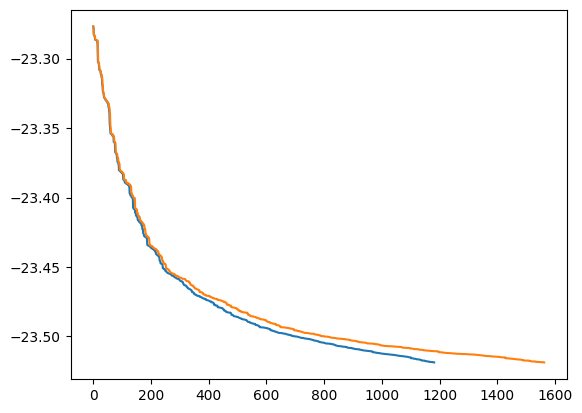

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 287.35it/s]


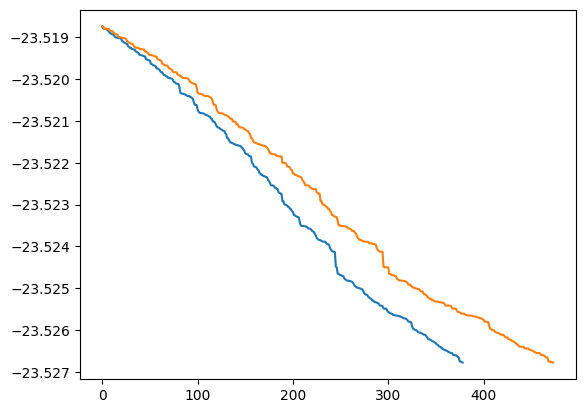

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 289.59it/s]


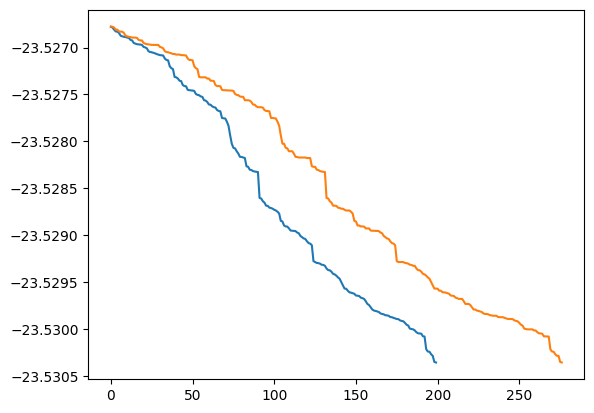

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:36<00:00, 275.37it/s]


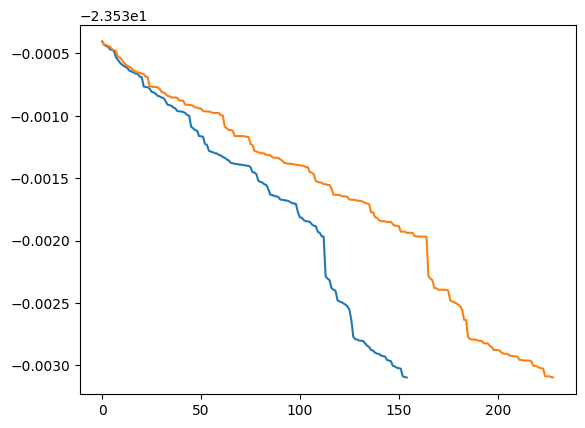

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:36<00:00, 275.81it/s]


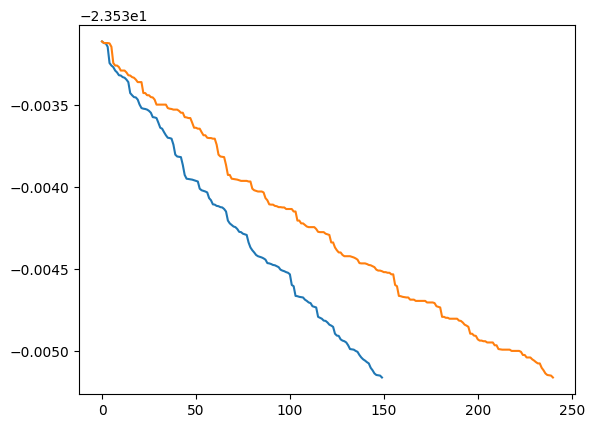

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 287.94it/s]


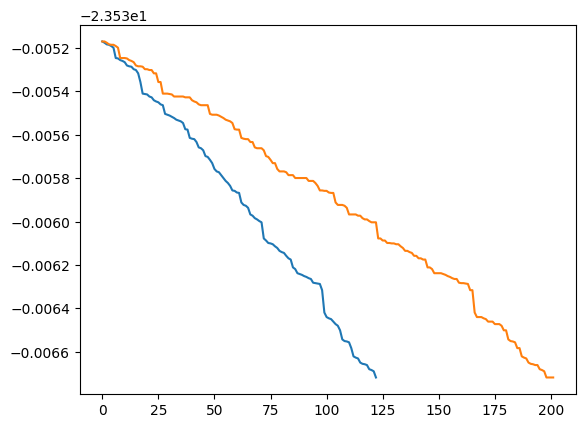

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 287.32it/s]


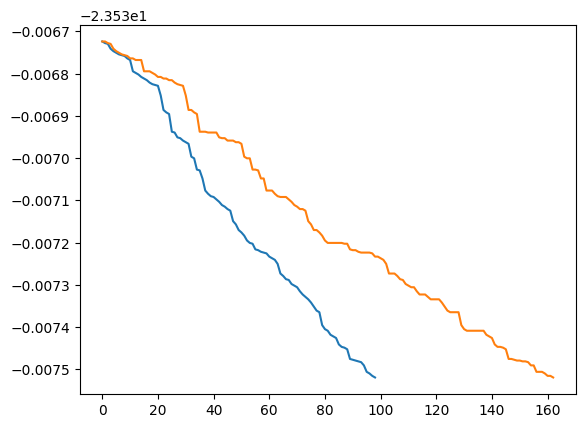

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 287.64it/s]


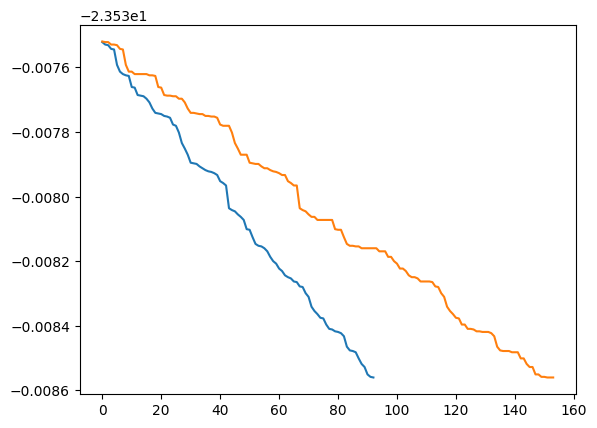

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 288.65it/s]


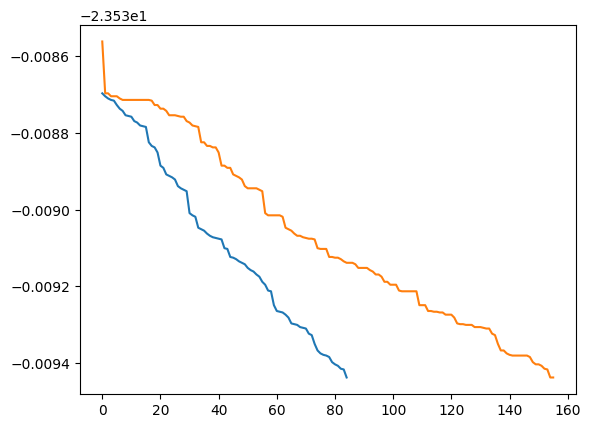

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 289.27it/s]


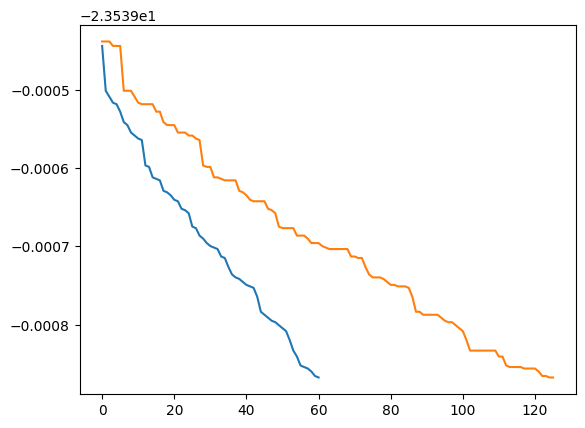

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000/10000 [00:34<00:00, 288.76it/s]


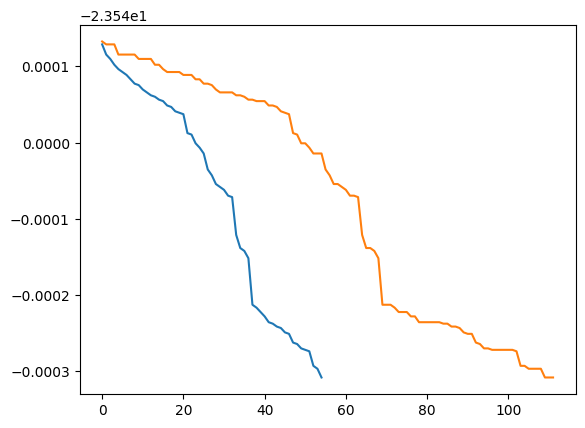

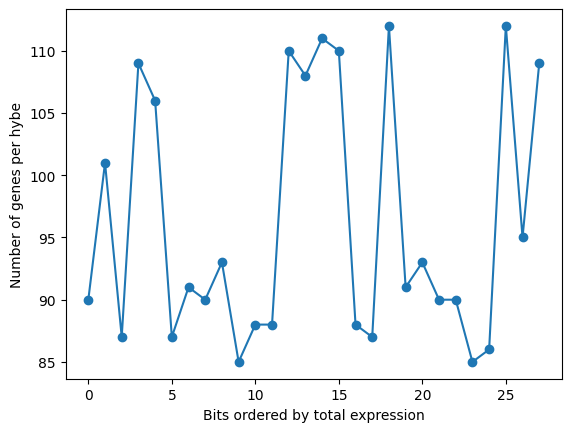

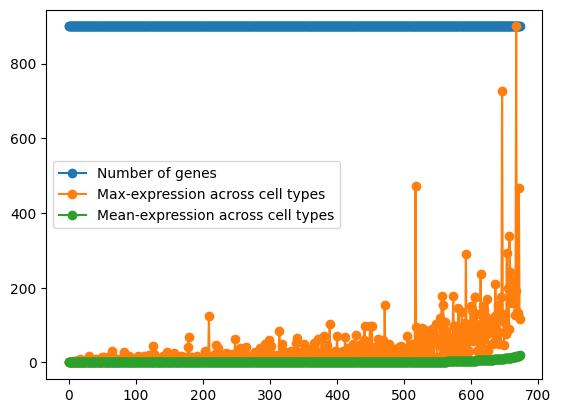

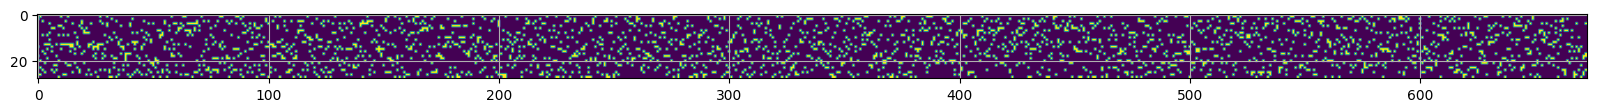

In [14]:
N=28
save_fl = os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + 'code__human_Basalganglia_675gn_MERFISH_Panel_final.pkl'
if not os.path.exists(save_fl):
    X_expr__ = np.array([df_expr.loc[:,gn] for gn in genes_ls ])
    genes_ = genes_ls
    
    Nreg = X_expr__.shape[0]
    Ps = getPs(X_expr__)
    Ps = torch.from_numpy(Ps.astype(np.float32)).to(device)
    X_exprT = torch.from_numpy(X_expr__.astype(np.float32)).to(device).T

    
    
    #codes = get_random_keep(N=N,Non=4,Nreg=Nreg,min_ham_dist=4)
    bin_code = get_initial_barcodes(number_of_bits=N,Non=4)
    
    # Before trimming it, save the initial binary code, so that we can use it later to add the blank genes.
    # this is needed because the code obtained from get_initialbarcode has some rondomness even when the n-bits is the same,
    # first check it is hamming distance of 4
    print(f'hamming distance of the codebook:',np.unique(scipy.spatial.distance.pdist(bin_code,metric = 'hamming')*bin_code.shape[-1]))
    np.save(os.path.dirname(os.getcwd()) + os.sep + 'design_outputs' + os.sep + 'initial_codebook_preFiltering.npy',bin_code,allow_pickle = True)
    
    bin_code = bin_code[:Nreg]
    codes = torch.from_numpy(bin_code.astype(np.float32)).to(device)
    codes_start = codes.clone()
    codes, ms_, ms = balance_code(codes,Ps,Non=4,min_ham_dist=4, Niter = 10000,beta = 100000)

    import matplotlib.pylab as plt
    plt.plot(ms)
    plt.plot(ms_)
    plt.show()

    for it_ in range(10):
        codes, ms_, ms = balance_code(codes,Ps,Non=4,min_ham_dist=4, Niter = 10000,beta = 10000000)
        import matplotlib.pylab as plt
        plt.plot(ms)
        plt.plot(ms_)
        plt.show()

    code = codes.cpu().numpy()

    X_expr_ = X_expr__.T
    #genes_ = gene_sets[icol]

    bit_expr = np.dot(X_expr_,code)
    plt.figure()
    plt.plot(np.sum(code,axis=0)[np.argsort(np.mean(bit_expr,axis=0))],'o-')
    plt.ylabel('Number of genes per hybe')
    plt.xlabel('Bits ordered by total expression')
    #plt.ylim([0,15])

    index = np.argsort(np.mean(X_expr_,axis=0))

    plt.figure()
    max_ = np.max(X_expr_)
    max__ = np.max(np.sum(code,axis=1))
    plt.plot(np.sum(code,axis=1)[index]/max__*max_,'o-',label='Number of genes')
    plt.plot(np.max(X_expr_,axis=0)[index],'o-',label='Max-expression across cell types')
    plt.plot(np.mean(X_expr_,axis=0)[index],'o-',label='Mean-expression across cell types')
    #plt.ylim([0,15])
    plt.legend()

    plt.figure(figsize=(20,20))
    plt.imshow(code[index].T[np.argsort(np.mean(bit_expr,axis=0))])
    plt.grid()
    plt.show()
    bit_expr = np.dot(X_expr_,code)

    code_final = code[:,np.argsort(np.mean(bit_expr,axis=0))]

    pickle.dump([code_final,X_expr_,genes_],open(save_fl,'wb'))